In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [12]:
#A10.2.)
#a.)
excel_data_df = pd.read_excel('youths.xlsx', sheet_name='Sheet1', dtype = str)
print(excel_data_df.columns.ravel())
excel_data_df

['gender' 'age' 'height' 'weight' 'Unnamed: 4' 'Unnamed: 5' 'gender.1'
 'age.1' 'height.1' 'weight.1']


,gender,age,height,weight,Unnamed: 4,Unnamed: 5,gender.1,age.1,height.1,weight.1
0,NaN,months,cm,kg,NaN,NaN,NaN,months,cm,kg
1,m,157,153.67,47.628,NaN,NaN,f,143,143.002,38.556
2,m,139,153.67,39.4632,NaN,NaN,f,191,158.75,51.03
3,m,146,146.05,40.824,NaN,NaN,f,160,157.48,42.8652
4,m,151,168.402,53.0712,NaN,NaN,f,157,163.83,56.0196
...,...,...,...,...,...,...,...,...,...,...
121,m,194,165.862,61.0092,NaN,NaN,NaN,NaN,NaN,NaN
122,m,186,168.91,50.8032,NaN,NaN,NaN,NaN,NaN,NaN
123,m,164,147.32,38.1024,NaN,NaN,NaN,NaN,NaN,NaN
124,m,155,145.542,36.5148,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
age = excel_data_df['age'].str.extract('(\d+)')
boysAge = np.float64(age.dropna()).T[0]

age = excel_data_df['age.1'].str.extract('(\d+)')
girlsAge = np.float64(age.dropna()).T[0]

height = excel_data_df['height'].str.extract('(\d+)')
boysHeight = np.float64(height.dropna()).T[0]

height = excel_data_df['height.1'].str.extract('(\d+)')
girlsHeight = np.float64(height.dropna()).T[0]

weight = excel_data_df['weight'].str.extract('(\d+)')
boysWeight = np.float64(weight.dropna()).T[0]

weight = excel_data_df['weight.1'].str.extract('(\d+)')
girlsWeight = np.float64(weight.dropna()).T[0]

allAge = np.concatenate((boysAge, girlsAge), axis = None)
allHeight = np.concatenate((boysHeight, girlsHeight), axis = None)
allWeight = np.concatenate((boysWeight, girlsWeight), axis = None)

<IPython.core.display.Javascript object>


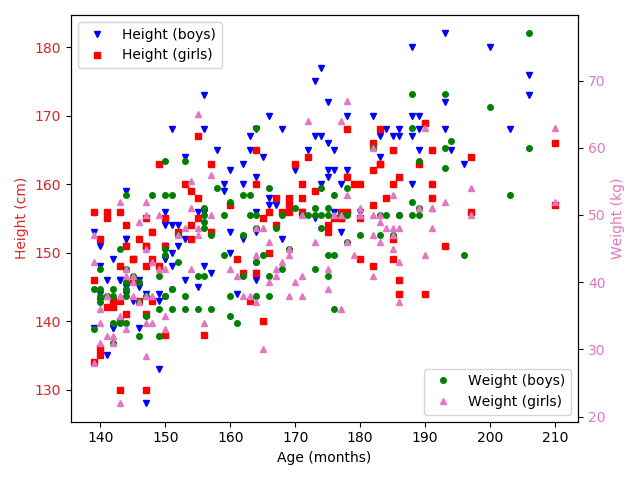

In [14]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Age (months)')
ax1.set_ylabel('Height (cm)', color=color)
plt.plot(boysAge, boysHeight, 'bv', markersize = 4, label = "Height (boys)")
plt.plot(girlsAge, girlsHeight, 'rs', markersize = 4, label = "Height (girls)")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc = 0)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:pink'
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
plt.plot(boysAge, boysWeight, 'go', markersize = 4, label = "Weight (boys)")
plt.plot(girlsAge, girlsWeight, '^', color = 'tab:pink', markersize = 4, label = "Weight (girls)")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
a = np.array([1.01, 2.05, 3.02, 3.96, 5.03, 5.98, 7.05, 8.1, 8.92, 10.1])
b = np.array([6.2, 8.7, 12.8, 14.5, 18.2, 20.5, 23.9, 28.2, 29.9, 33.2])

def cov(a, b):
    if len(a) != len(b):
        return
    aMean, bMean  = np.mean(a), np.mean(b)
    aVar, bVar = np.var(a), np.var(b)
    return np.sum((a-aMean)*(b-bMean))/(len(a)*np.sqrt(aVar*bVar))
    
print(cov(a, b))

np.corrcoef(a, b)

0.9986823020876908


array([[1.       , 0.9986823],
       [0.9986823, 1.       ]])

In [16]:
print("COVARIENCES:")
print("Boys:","\n Age/Height:", cov(boysAge, boysHeight), "\t Age/Weight:", cov(boysAge, boysWeight), 
        "\t Weight/Height:", cov(boysWeight, boysHeight))
print("Girls:","\n Age/Height:", cov(girlsAge, girlsHeight), "\t Age/Weight:", cov(girlsAge, girlsWeight), 
        "\t Weight/Height:", cov(girlsWeight, girlsHeight))
print("All:","\n Age/Height:", cov(allAge, allHeight), "\t Age/Weight:", cov(allAge, allWeight), 
        "\t Weight/Height:", cov(allWeight, allHeight))

COVARIENCES:
Boys: 
 Age/Height: 0.7727704464257477 	 Age/Weight: 0.6810639097484925 	 Weight/Height: 0.7981976861184757
Girls: 
 Age/Height: 0.5421752441563645 	 Age/Weight: 0.5376558660887836 	 Weight/Height: 0.7459833859033915
All: 
 Age/Height: 0.6511854438649692 	 Age/Weight: 0.6065186744960621 	 Weight/Height: 0.774317092296557


In [17]:
#b.)

arg = np.argsort(boysAge)
lim1 = np.where(boysAge[arg] < 156)[0][-1]
lim2 = np.where(boysAge[arg] > 180)[0][0]

boysAge1 = boysAge[arg][:lim1]
boysAge2 = boysAge[arg][lim1:lim2]
boysAge3 = boysAge[arg][lim2:]

boysHeight1 = boysHeight[arg][:lim1]
boysHeight2 = boysHeight[arg][lim1:lim2]
boysHeight3 = boysHeight[arg][lim2:]

boysWeight1 = boysWeight[arg][:lim1]
boysWeight2 = boysWeight[arg][lim1:lim2]
boysWeight3 = boysWeight[arg][lim2:]



arg = np.argsort(girlsAge)
lim1 = np.where(girlsAge[arg] < 156)[0][-1]
lim2 = np.where(girlsAge[arg] > 180)[0][0]

girlsAge1 = girlsAge[arg][:lim1]
girlsAge2 = girlsAge[arg][lim1:lim2]
girlsAge3 = girlsAge[arg][lim2:]

girlsHeight1 = girlsHeight[arg][:lim1]
girlsHeight2 = girlsHeight[arg][lim1:lim2]
girlsHeight3 = girlsHeight[arg][lim2:]

girlsWeight1 = girlsWeight[arg][:lim1]
girlsWeight2 = girlsWeight[arg][lim1:lim2]
girlsWeight3 = girlsWeight[arg][lim2:]


arg = np.argsort(allAge)
lim1 = np.where(allAge[arg] < 156)[0][-1]
lim2 = np.where(allAge[arg] > 180)[0][0]

allAge1 = allAge[arg][:lim1]
allAge2 = allAge[arg][lim1:lim2]
allAge3 = allAge[arg][lim2:]

allHeight1 = allHeight[arg][:lim1]
allHeight2 = allHeight[arg][lim1:lim2]
allHeight3 = allHeight[arg][lim2:]

allWeight1 = allWeight[arg][:lim1]
allWeight2 = allWeight[arg][lim1:lim2]
allWeight3 = allWeight[arg][lim2:]

In [18]:
print("Age < 156 months:")
print("Boys:","\n Age/Height:", cov(boysAge1, boysHeight1), "\t Age/Weight:", cov(boysAge1, boysWeight1), 
        "\t Weight/Height:", cov(boysWeight1, boysHeight1))
print("Girls:","\n Age/Height:", cov(girlsAge1, girlsHeight1), "\t Age/Weight:", cov(girlsAge1, girlsWeight1), 
        "\t Weight/Height:", cov(girlsWeight1, girlsHeight1))
print("All:","\n Age/Height:", cov(allAge1, allHeight1), "\t Age/Weight:", cov(allAge1, allWeight1), 
        "\t Weight/Height:", cov(allWeight1, allHeight1))
print("\n")
print("156 months <= Age <= 180 months:")
print("Boys:","\n Age/Height:", cov(boysAge2, boysHeight2), "\t Age/Weight:", cov(boysAge2, boysWeight2), 
        "\t Weight/Height:", cov(boysWeight2, boysHeight2))
print("Girls:","\n Age/Height:", cov(girlsAge2, girlsHeight2), "\t Age/Weight:", cov(girlsAge2, girlsWeight2), 
        "\t Weight/Height:", cov(girlsWeight2, girlsHeight2))
print("All:","\n Age/Height:", cov(allAge2, allHeight2), "\t Age/Weight:", cov(allAge2, allWeight2), 
        "\t Weight/Height:", cov(allWeight2, allHeight2))
print("\n")
print("Age > 180 months:")
print("Boys:","\n Age/Height:", cov(boysAge3, boysHeight3), "\t Age/Weight:", cov(boysAge3, boysWeight3), 
        "\t Weight/Height:", cov(boysWeight3, boysHeight3))
print("Girls:","\n Age/Height:", cov(girlsAge3, girlsHeight3), "\t Age/Weight:", cov(girlsAge3, girlsWeight3), 
        "\t \t Weight/Height:", cov(girlsWeight3, girlsHeight3))
print("All:","\n Age/Height:", cov(allAge3, allHeight3), "\t Age/Weight:", cov(allAge3, allWeight3), 
        "\t Weight/Height:", cov(allWeight3, allHeight3))

Age < 156 months:
Boys: 
 Age/Height: 0.40705077496693637 	 Age/Weight: 0.3524177517906074 	 Weight/Height: 0.6738009086062192
Girls: 
 Age/Height: 0.47027242909672723 	 Age/Weight: 0.5476309678634345 	 Weight/Height: 0.7983932350742616
All: 
 Age/Height: 0.40628985180239635 	 Age/Weight: 0.4096453461557705 	 Weight/Height: 0.7262642862910224


156 months <= Age <= 180 months:
Boys: 
 Age/Height: 0.3406095750030319 	 Age/Weight: 0.1988307520090255 	 Weight/Height: 0.6542742176390269
Girls: 
 Age/Height: 0.3165241492547176 	 Age/Weight: 0.3395175411455797 	 Weight/Height: 0.5615476939911979
All: 
 Age/Height: 0.21685920201110562 	 Age/Weight: 0.16449392665292603 	 Weight/Height: 0.5935417704613414


Age > 180 months:
Boys: 
 Age/Height: 0.37591000812291525 	 Age/Weight: 0.49791953575463743 	 Weight/Height: 0.6743495752062036
Girls: 
 Age/Height: 0.09359872518243546 	 Age/Weight: 0.447838747838911 	 	 Weight/Height: 0.6364185904524987
All: 
 Age/Height: 0.2464886071774328 	 Age/Weight: 0

<IPython.core.display.Javascript object>


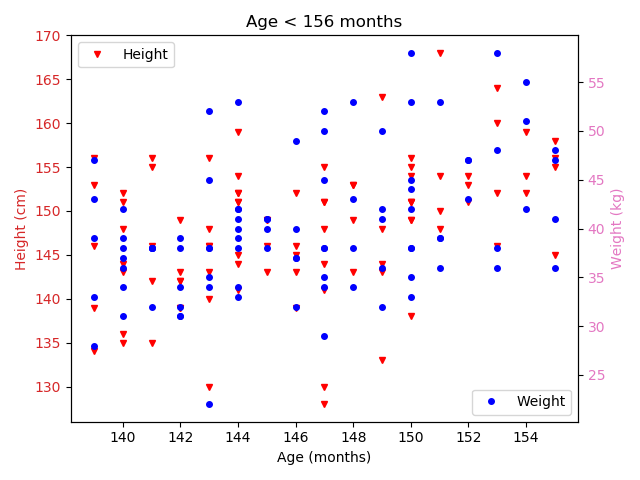

<IPython.core.display.Javascript object>


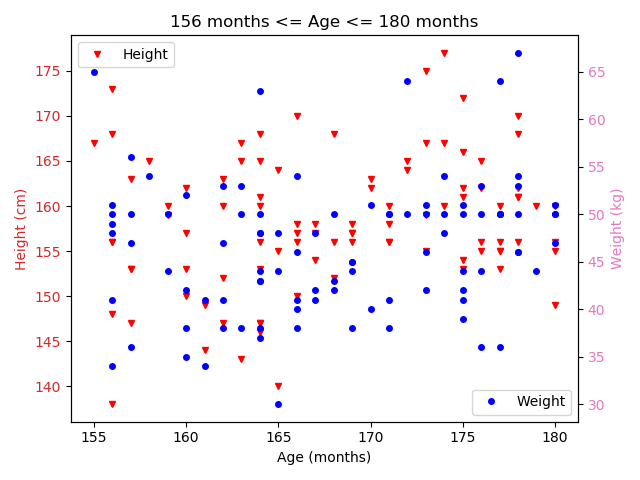

<IPython.core.display.Javascript object>


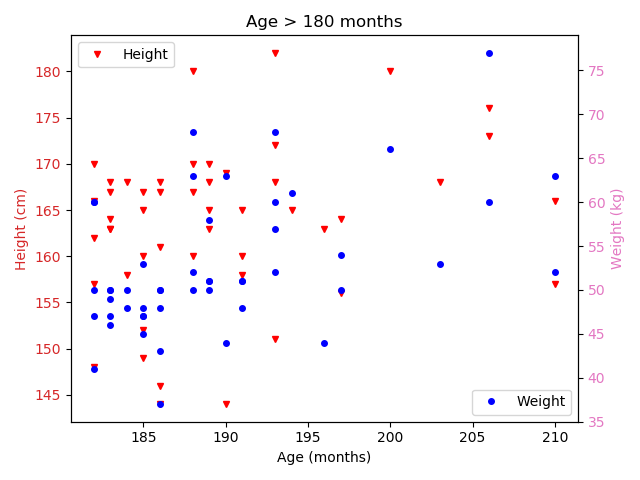

In [19]:
fig, ax1 = plt.subplots()
plt.title("Age < 156 months")
color = 'tab:red'
ax1.set_xlabel('Age (months)')
ax1.set_ylabel('Height (cm)', color=color)
plt.plot(allAge1, allHeight1, 'rv', markersize = 4, label = "Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc = 2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:pink'
plt.plot(allAge1, allWeight1, 'bo', markersize = 4, label = "Weight")
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax1 = plt.subplots()
plt.title("156 months <= Age <= 180 months")
color = 'tab:red'
ax1.set_xlabel('Age (months)')
ax1.set_ylabel('Height (cm)', color=color)
plt.plot(allAge2, allHeight2, 'rv', markersize = 4, label = "Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc = 2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:pink'
plt.plot(allAge2, allWeight2, 'bo', markersize = 4, label = "Weight")
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

fig, ax1 = plt.subplots()
plt.title("Age > 180 months")
color = 'tab:red'
ax1.set_xlabel('Age (months)')
ax1.set_ylabel('Height (cm)', color=color)
plt.plot(allAge3, allHeight3, 'rv', markersize = 4, label = "Height")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc = 2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:pink'
plt.plot(allAge3, allWeight3, 'bo', markersize = 4, label = "Weight")
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<IPython.core.display.Javascript object>


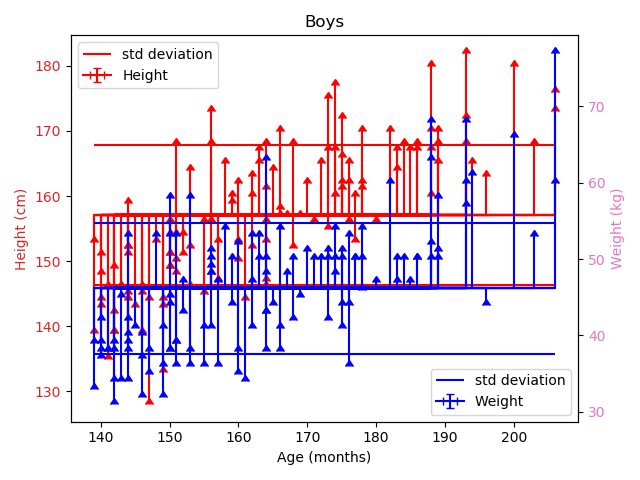

<IPython.core.display.Javascript object>


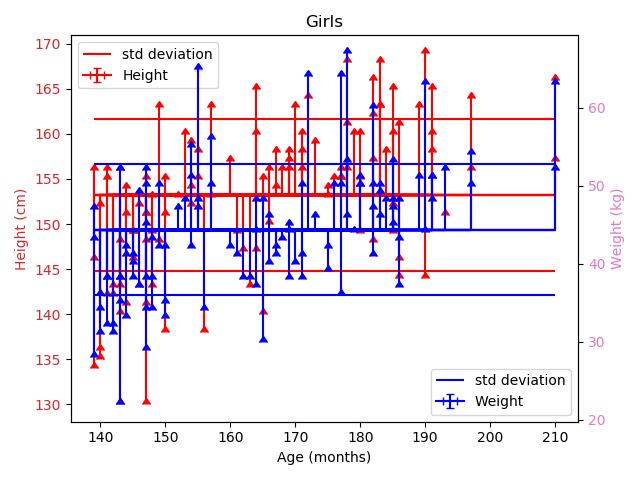

In [20]:
hmean = np.mean(boysHeight)
hstd = np.sqrt(np.var(boysHeight))
wmean = np.mean(boysWeight)
wstd = np.sqrt(np.var(boysWeight))

fig, ax1 = plt.subplots()
plt.title("Boys")
color = 'tab:red'
ax1.set_xlabel('Age (months)')
ax1.set_ylabel('Height (cm)', color=color)
plt.errorbar(boysAge, [hmean]*len(boysAge), yerr= boysHeight - hmean, xerr = 0, lolims=True, label = "Height", color = 'r')
plt.hlines([hmean + hstd, hmean - hstd, hmean], np.amin(boysAge), np.amax(boysAge), color = 'r', label = "std deviation")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc = 2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:pink'
plt.errorbar(boysAge, [wmean]*len(boysAge), yerr= boysWeight - wmean, xerr = 0, lolims=True, label = "Weight", color = 'b')
plt.hlines([wmean + wstd, wmean - wstd, wmean], np.amin(boysAge), np.amax(boysAge), color = 'b', label = "std deviation")
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

hmean = np.mean(girlsHeight)
hstd = np.sqrt(np.var(girlsHeight))
wmean = np.mean(girlsWeight)
wstd = np.sqrt(np.var(girlsWeight))

fig, ax1 = plt.subplots()
plt.title("Girls")
color = 'tab:red'
ax1.set_xlabel('Age (months)')
ax1.set_ylabel('Height (cm)', color=color)
plt.errorbar(girlsAge, [hmean]*len(girlsAge), yerr= girlsHeight - hmean, xerr = 0, lolims=True, label = "Height", color = 'r')
plt.hlines([hmean + hstd, hmean - hstd, hmean], np.amin(girlsAge), np.amax(girlsAge), color = 'r', label = "std deviation")
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(loc = 2)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:pink'
plt.errorbar(girlsAge, [wmean]*len(girlsAge), yerr= girlsWeight - wmean, xerr = 0, lolims=True, label = "Weight", color = 'b')
plt.hlines([wmean + wstd, wmean - wstd, wmean], np.amin(girlsAge), np.amax(girlsAge), color = 'b', label = "std deviation")
ax2.set_ylabel('Weight (kg)', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=4)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#c.)
#From the results one may deduce that the covariance between age and weight and age and height are not that high.
#This means the children grow somewhat independently of age. The covariance between height and weight however
#is larger meaning there is a relation between weight gained when height gained.

<IPython.core.display.Javascript object>


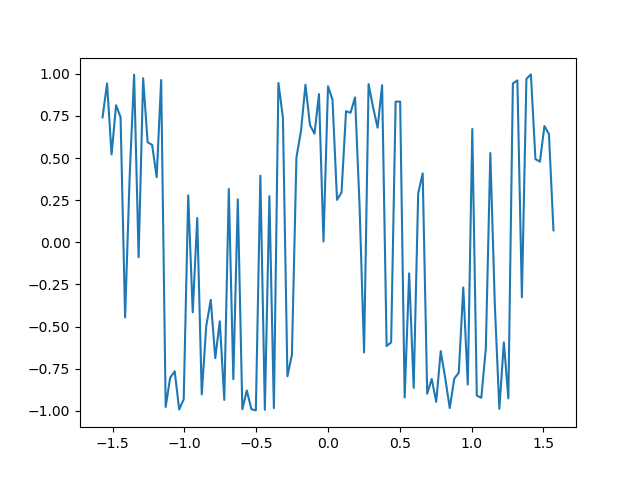

In [21]:
#A10.3.)
N = 101
theta = np.array([np.random.uniform(low = -np.pi/2, high = np.pi/2) for i in range(N)])
omega = 4
T = 2*np.pi/omega
t = np.linspace(-T, T, N)
x = np.cos(omega*t + theta)
plt.plot(t, x)

<IPython.core.display.Javascript object>


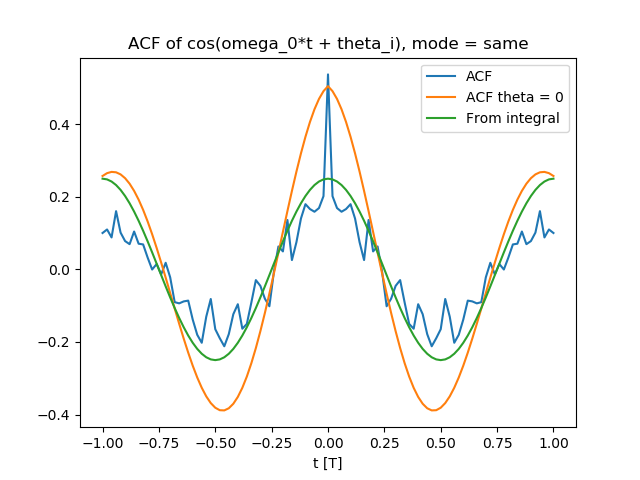

In [22]:
#Using mode = same
#plt.xcorr(x, x)
y = np.correlate(x, x, mode='same')/N
n = np.linspace(-1, 1, N)
x1 = np.cos(omega*t + 0)
y1 = np.correlate(x1, x1, mode='same')/N

#From integral:
#tau = 2*np.pi*n
yint = 0.25*np.cos(2*np.pi*n)

plt.title("ACF of cos(omega_0*t + theta_i), mode = same")
plt.plot(n, y, label = "ACF")
plt.plot(n, y1, label = "ACF theta = 0")
plt.plot(n, yint, label = "From integral")
plt.xlabel("t [T]")
plt.legend()

#The analytical from the integral fits in well.

<IPython.core.display.Javascript object>


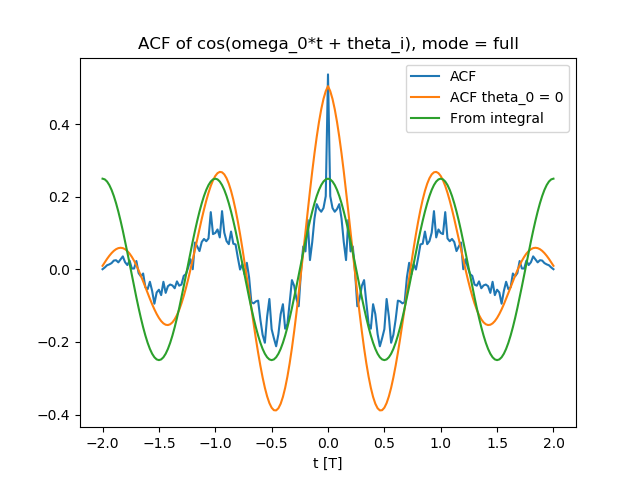

In [23]:
#Using mode = full
#plt.xcorr(x, x)
y = np.correlate(x, x, mode='full')/N
n = np.linspace(-2, 2, 2*N-1)
x1 = np.cos(omega*t + 0)
y1 = np.correlate(x1, x1, mode='full')/N

#From integral:
#tau = 4*np.pi*n
yint = 0.25*np.cos(2*np.pi*n)

plt.title("ACF of cos(omega_0*t + theta_i), mode = full")
plt.plot(n, y, label = "ACF")
plt.plot(n, y1, label = "ACF theta_0 = 0")
plt.plot(n, yint, label = "From integral")
plt.xlabel("t [T]")
plt.legend()

#The analytical from the integral fits in well.

<IPython.core.display.Javascript object>


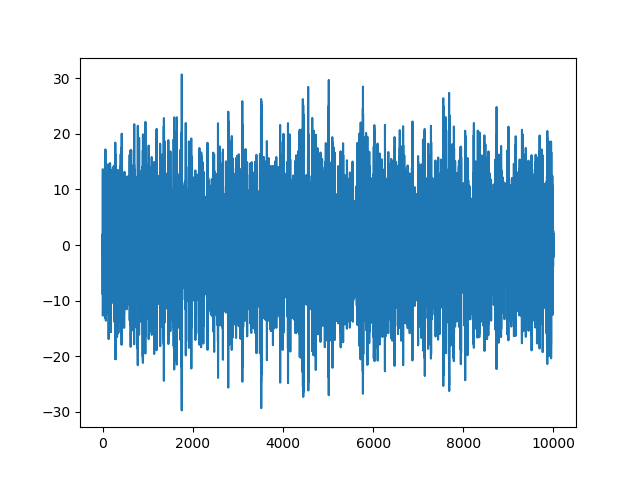

In [24]:
#A10.4.)
#a.)
h = np.array([13, -12, 11, -10, 9, -8, 7, -6, 5, -4, 3, -2, 1])
noise10000 = np.array([np.random.uniform(low = -0.5, high = 0.5) for i in range(10000)])
y = np.convolve(noise10000,h,'same')
n = np.linspace(0, 9999, 10000)
plt.plot(n, y)

<IPython.core.display.Javascript object>


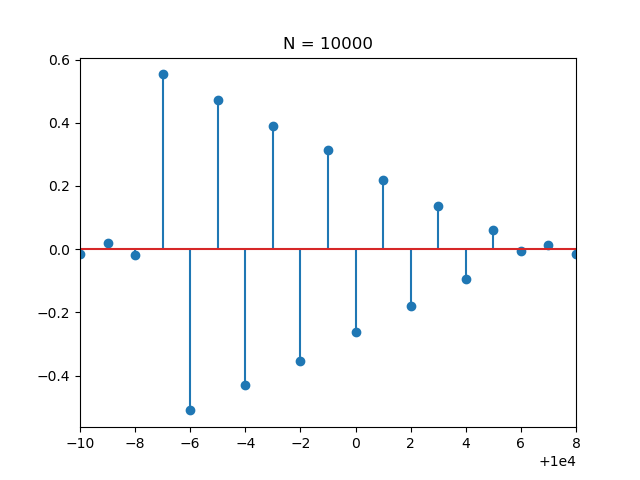

0.0005283869734582955


<IPython.core.display.Javascript object>


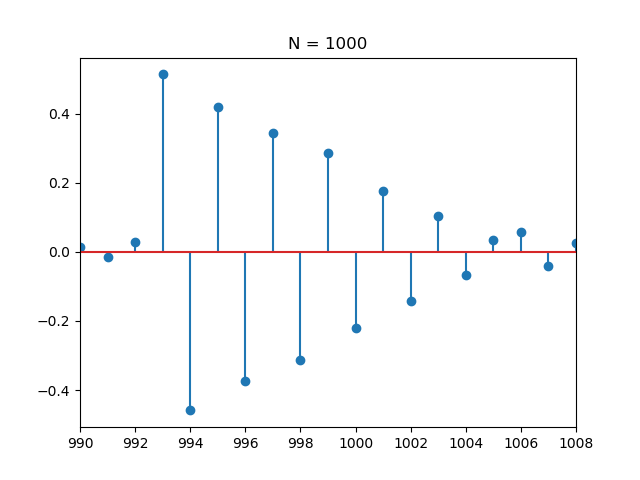

0.0009793291841821963


<IPython.core.display.Javascript object>


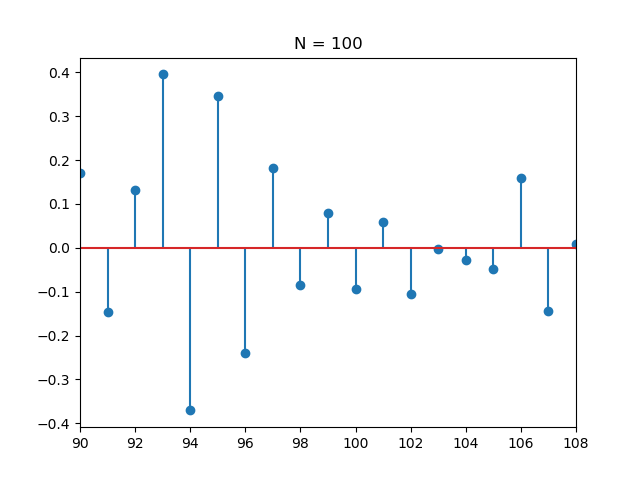

0.0037334758043551727


<IPython.core.display.Javascript object>


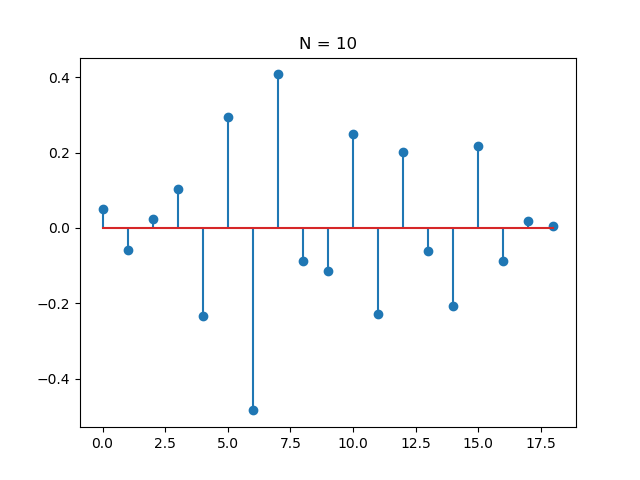

0.002273489934086925


In [25]:
#plt.stem(nyx[9990:10008], cyx[9990:10008], use_line_collection = True)
cyx = np.correlate(y, noise10000, mode='full')/19999
plt.figure()
plt.title("N = 10000")
plt.stem(cyx, use_line_collection = True)
plt.xlim(9990, 10008)

SNR = np.mean(cyx)/np.sqrt(np.var(cyx))
print(SNR)

N = int(len(y)/10)
cyx = np.correlate(y[:N], noise10000[:N], mode='full')/(2*N-1)
plt.figure()
plt.title(f"N = {N}")
plt.stem(cyx, use_line_collection = True)
plt.xlim(990, 1008)

SNR = np.mean(cyx)/np.sqrt(np.var(cyx))
print(SNR)

N = int(len(y)/100)
cyx = np.correlate(y[:N], noise10000[:N], mode='full')/(2*N-1)
plt.figure()
plt.title(f"N = {N}")
plt.stem(cyx, use_line_collection = True)
plt.xlim(90, 108)

SNR = np.mean(cyx)/np.sqrt(np.var(cyx))
print(SNR)

N = int(len(y)/1000)
cyx = np.correlate(y[:N], noise10000[:N], mode='full')/(2*N-1)
plt.figure()
plt.title(f"N = {N}")
plt.stem(cyx, use_line_collection = True)
#plt.xlim(90, 108)

SNR = np.mean(cyx)/np.sqrt(np.var(cyx))
print(SNR)

#When N is closer to 100 than 1000 the sequence is no longer resolved completely, but a lot of the sequence is.

In [26]:
#b.)

SNR = np.zeros(500)
for i in range(0, 10000, 20):
    if i%1000 == 0:
        print(i)
    cyx = np.correlate(y[:i+20], noise10000[:i+20], mode='full')/(2*(i+20)-1)
    SNR[int(i/20)] = np.mean(cyx)/np.sqrt(np.var(cyx))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


<IPython.core.display.Javascript object>


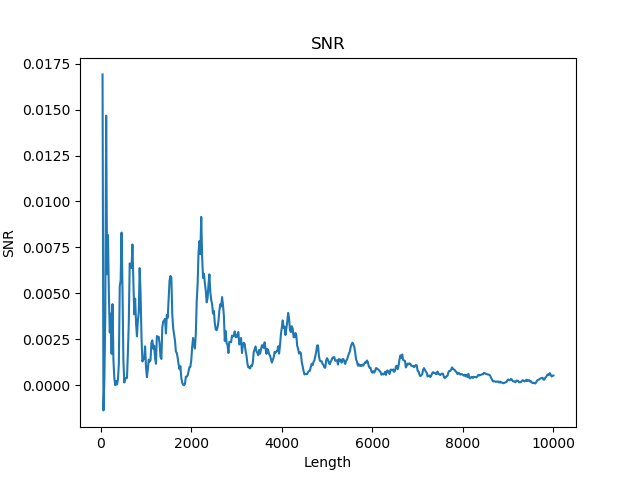

Text(0.5, 0, 'Length')

In [27]:
n = np.linspace(20, 10000, 500)
plt.plot(n[1:], SNR[1:])
plt.title("SNR")
plt.ylabel("SNR")
plt.xlabel("Length")

#SNR seems to converge at about 5000 noise points.

In [28]:
End = "End"
End

'End'

In [29]:
End = "End"
End

'End'

In [30]:
End = "End"
End

'End'

In [31]:
End = "End"
End

'End'

In [32]:
End = "End"
End

'End'

In [33]:
End = "End"
End

'End'